<a href="https://colab.research.google.com/github/nestorm94/CD_2023/blob/main/taller_Introduccion_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Se importa el dataframe el dataset indiceMasaCorporal.csv
df_compact = pd.read_csv("/content/rpi_data_compact.csv")

In [ ]:
df_compact.head()
df_compact.info()

df_compact = pd.read_csv("/content/rpi_data_compact.csv", index_col=0)
df_compact

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         680 non-null    int64  
 1   Ping (ms)          679 non-null    object 
 2   Download (Mbit/s)  679 non-null    object 
 3   Upload (Mbit/s)    673 non-null    float64
 4   Date               673 non-null    object 
 5   Time               673 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 32.0+ KB


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
675,retrieve,2016-11-24 19:18:03,NaN,NaN,NaN
676,retrieve,2016-11-24 19:18:06,NaN,NaN,NaN
677,retrieve,2016-11-24 19:18:10,NaN,NaN,NaN
678,retrieve,2016-11-24 19:18:13,NaN,NaN,NaN


In [ ]:
NaNs_in_df  = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [ ]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [ ]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

In [ ]:
df_compact.isnull().sum().sum()


23

In [ ]:
porcentaje=((df_compact.isnull().sum().sum()*100)/df_compact.count().sum().sum())
print(np.round(porcentaje,decimals=2))



0.68


In [ ]:
df_compact_clean = df_compact.dropna()

In [ ]:
df_compact_clean.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [ ]:
df_compact_clean.head()


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [ ]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)', 'Download (Mbit/s)', 'Upload (Mbit/s)'])
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [ ]:
df_compact_clean['Ping (ms)'] = df_compact_clean['Ping (ms)'].astype('float64')
df_compact_clean['Download (Mbit/s)'] = df_compact_clean['Download (Mbit/s)'].astype('float64')
df_compact_clean.dtypes

Date                  object
Time                  object
Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
dtype: object

In [ ]:
df_compact_clean.to_csv('./rpi_data_processed.csv',index=False)
df_clean = df_compact_clean
 

In [ ]:
df_clean.head()
df_clean.dtypes

Date                  object
Time                  object
Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
dtype: object

In [ ]:
stats_ping = (df_clean.mean()['Ping (ms)'], df_clean.std()['Ping (ms)'])
stats_download = (df_clean.mean()['Download (Mbit/s)'], df_clean.std()['Download (Mbit/s)'])
stats_upload = (df_clean.mean()['Upload (Mbit/s)'], df_clean.std()['Upload (Mbit/s)'])

<ipython-input-113-1640a4bdc3fc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_ping = (df_clean.mean()['Ping (ms)'], df_clean.std()['Ping (ms)'])
<ipython-input-113-1640a4bdc3fc>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_ping = (df_clean.mean()['Ping (ms)'], df_clean.std()['Ping (ms)'])
<ipython-input-113-1640a4bdc3fc>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Sel

In [ ]:
print("Avarage ping time: {} += {} ms".format(stats_ping[0],stats_ping[1]))
print("Avarage download speed: {} += {} ms".format(*stats_download))
print("Avarage upload time: {} += {} ms".format(*stats_upload))

Avarage ping time: 21.115451708766717 += 5.161225495663228 ms
Avarage download speed: 90.44921248142644 += 3.465647031815227 ms
Avarage upload time: 13.697607726597328 += 1.0804708853031766 ms


In [ ]:
print("Mínimo:", np.min(df_clean))
print("Máximo:", np.max(df_clean))
print("Desviación estándar:", np.std(df_clean))
print("Varianza:", np.var(df_clean))

Mínimo: Date                 2016-11-24
Time                   13:36:25
Ping (ms)                16.167
Download (Mbit/s)         58.48
Upload (Mbit/s)            6.21
dtype: object
Máximo: Date                 2016-11-24
Time                   19:18:16
Ping (ms)                76.528
Download (Mbit/s)         92.87
Upload (Mbit/s)           14.55
dtype: object
Desviación estándar: Ping (ms)            5.157390
Download (Mbit/s)    3.463071
Upload (Mbit/s)      1.079668
dtype: float64
Varianza: Ping (ms)            26.598667
Download (Mbit/s)    11.992863
Upload (Mbit/s)       1.165683
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype,

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 679
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               673 non-null    object 
 1   Time               673 non-null    object 
 2   Ping (ms)          673 non-null    float64
 3   Download (Mbit/s)  673 non-null    float64
 4   Upload (Mbit/s)    673 non-null    float64
dtypes: float64(3), object(2)
memory usage: 31.5+ KB


In [ ]:
df_corr = df_clean[['Ping (ms)', 'Upload (Mbit/s)', 'Download (Mbit/s)']].corr()
print(df_corr)

                   Ping (ms)  Upload (Mbit/s)  Download (Mbit/s)
Ping (ms)           1.000000        -0.463099          -0.045626
Upload (Mbit/s)    -0.463099         1.000000           0.083690
Download (Mbit/s)  -0.045626         0.083690           1.000000


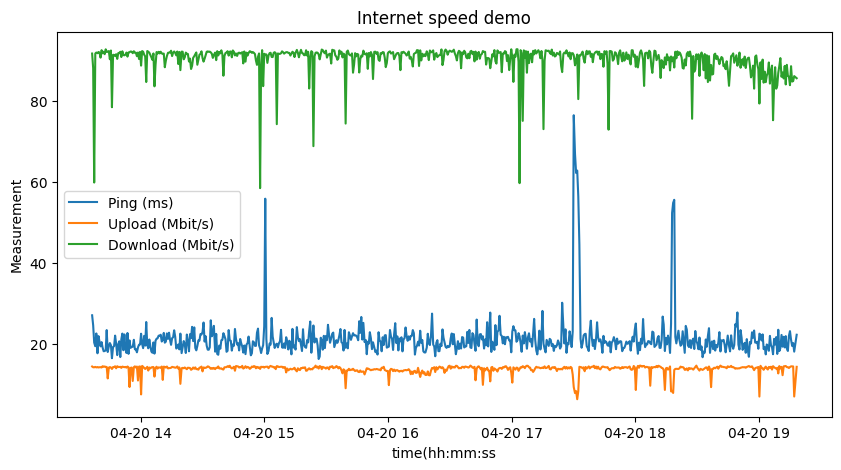

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')


plt.xlabel('time(hh:mm:ss')
plt.ylabel('Measurement')
plt.title('Internet speed demo')

ax.legend()
plt.show()

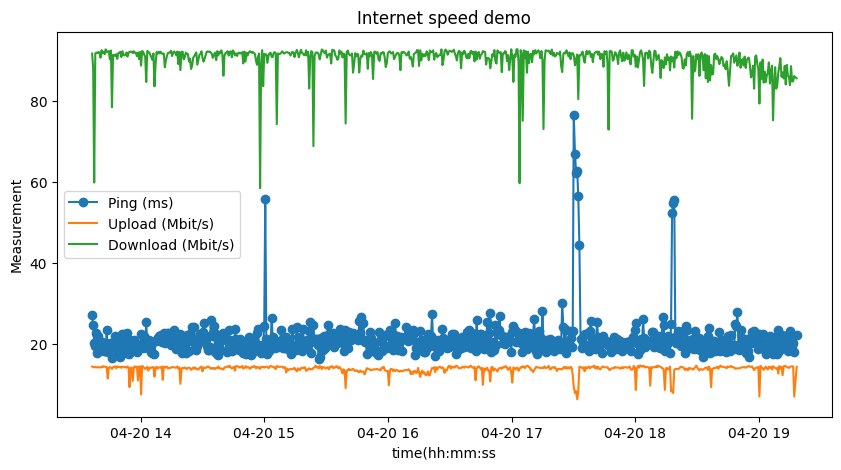

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)',  marker='o')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

plt.xlabel('time(hh:mm:ss')
plt.ylabel('Measurement')
plt.title('Internet speed demo')

ax.legend()
plt.show()